# SVM Classifier (non-linear kernel)
*Originally code implemented for course Pattern Recognition and Machine Learning, adjusted the data loading for MVDIA course*

MVIDIA, Exercise 1, Task 2

Author: Eetu Knutars

January 15th 2025

In [2]:
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

Kernel function

In [3]:
def kernel_poly2(x1, x2):
    # Calculate the kernel value
    r = (x1.T @ x2 + 1)**2
    return r

Data onboarding

In [4]:
data = sio.loadmat('data.mat')['data']
traindata = data[:,0:2]
trainclass = data[:,2]

x = traindata.copy()
y = trainclass.copy()
y = y.astype(float)
y[np.where(y == 1)] = -1
y[np.where(y == 0)] = 1

Optimisation arguments and optimisation by quadratic programming

In [5]:
LB = 0 # lower bound
C = 1 # upper bound

N = len(y)     # length of data

# Specify P, q, G, h, A, b
H = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        H[i,j] = y[i]*y[j]*kernel_poly2(x[i], x[j])
P = cvxopt.matrix(H)
q = cvxopt.matrix(-1*np.ones([N,1]))
A = cvxopt.matrix(y.T, (1,N))
b = cvxopt.matrix([0.0])
G = cvxopt.matrix(np.vstack((-np.eye(N), np.eye(N))))
h = cvxopt.matrix(np.hstack((0 * np.ones(N), C * np.ones(N))))

cvxopt.solvers.options['show_progress'] = False

# Run solver
sol = cvxopt.solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
alphas[np.where(alphas < 1e-6)] = 0
print("Classes of support vectors", trainclass[np.where(alphas>0)[0]])

Classes of support vectors [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


Support vectors based on close-to-zero values and discriminant function parameters

In [6]:
# The support vectors (indeces)
support_vectors = np.where(alphas > 0)[0]

# Finding one support vector from Class 1 for classification
support_index = support_vectors[y[support_vectors]==1][0]

Classification of test data

In [7]:
def svm_classifier(point):
    total = 1
    for k in support_vectors:
        total += alphas[k]*y[k]*(kernel_poly2(x[k], point) - kernel_poly2(x[k], x[support_index]))
    return total

In [8]:
testclass = []
for testpoint in traindata:
    if svm_classifier(testpoint) > 0: testclass.append(0)
    else: testclass.append(1)

# Calculate classification accuracy with the training set
print("Accuracy:", np.mean(testclass==trainclass))

Accuracy: 0.99


Option: Visualise the results

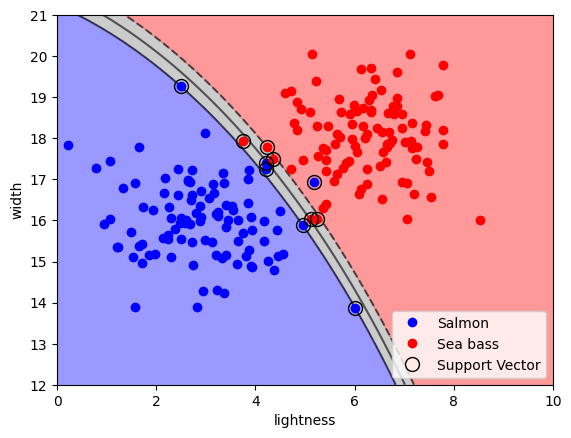

In [9]:
X,Y = np.meshgrid(np.linspace(0,10,1000), np.linspace(12,21,1000))

Z = svm_classifier([np.ravel(X),np.ravel(Y)])
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, levels=[-100,-1,1, 100], colors=["red", "grey","blue", ""], alpha=0.4)
plt.contour(X, Y, Z, levels=[-1,0,1], colors=["black"], alpha=0.6)
plt.plot(traindata[np.where(trainclass==0),0].T, traindata[np.where(trainclass==0),1].T, 'bo', label="Salmon")
plt.plot(traindata[np.where(trainclass==1),0].T, traindata[np.where(trainclass==1),1].T, 'ro', label="Sea bass")
plt.plot(traindata[support_vectors,0].T, traindata[support_vectors,1].T, 'ko', fillstyle='none', label="Support Vector", markersize=10)
plt.legend(loc=4)
plt.xlabel("lightness")
plt.ylabel("width")
plt.show()